In [8]:
# import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f,chi2,zscore
import matplotlib.pyplot as plt
from numpy.linalg import inv, det, eig
from sklearn.linear_model import LinearRegression
from statsmodels.multivariate.manova import MANOVA
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Principal Component Analysis (PCA)

- PCA transforms a set of correlated response variables into a smaller set of uncorrelated variables called principal components.
- Idea: A few samll principal components may contain almost all of the information that was available in the origianl data
- Reasons for using PCA
1. Outlier Detection: smaller varialbes $ \rightarrow$ easier to detect outliers
2. Cluster Analysis: help clustering, verify the result of clustering
3. Discriminant Analysis: need to invert a covariance matrix, small sample size ($n<p$) causes problem, new variables are used as input variable
4. Regression: determine whether multicollinearity occurs among predictors
5. Multivariate Normal: each principal components has normal if the original data has multivariate normal

- Sketch of PCA <br>
$X_1, X_2, ... , X_p \;\; \Rightarrow \;\; Y_1, Y_2, ... , Y_q  \;\;  (q\leq p)$  <br>
 (correlated)       $ \;\; \;\;\;\;$             PCA            $ \;\;\;\;$             (uncorrelated) <br>
 
 <br>
 $Y_1 = a_1X_1 + a_2X_2 + ... + a_pX_p$ ; linear combination      , where $\underset{\sim}{a} = (a_1, a_2, ... , a_p)'$ <br>
 $Y_2 = b_1X_1 + b_2X_2 + ... + b_pX_p$ ; linear combination     , where $\underset{\sim}{b} = (b_1, b_2, ... , b_p)'$ <br>
 . <br>
 . <br>
 . <br>
 
 $\underset{\sim}{a}' \underset{\sim}{b} = 0$   ; uncorrelated , ...
 
 

- Objectives of PCA
1. Reduce the dimensionality of the data set
$\rightarrow$ discover the true dimensionality of the data
2. Identify new meaningful underlying variables

## PCA on $\rho$ (correlation matrix)
We will only implement the PCA on the correlation matrix (not the covariance matrix)
- PCA does not require multivariate normal assumption
- PCA using $\underset{\sim}{Z} \equiv PCA$ on $\textbf{R}(= \hat{\rho}$)
- Same procedures with PCA on $\Sigma$

- Consider the linear combination
 
 
 $Y_1 =  \underset{\sim}{a_1}' \underset{\sim}{X}  a_{11}X_1 + a_{12}X_2 + ... + a_{1p}X_p$  <br>
 $Y_1 =  \underset{\sim}{a_2}' \underset{\sim}{X}  a_{21}X_1 + a_{22}X_2 + ... + a_{2p}X_p$  <br>
 . <br>
 . <br>
 . <br>
  $Y_1 =  \underset{\sim}{a_p}' \underset{\sim}{X}  a_{p1}X_1 + a_{p2}X_2 + ... + a_{pp}X_p$  <br>
  Then <br>
  $Var(Y_1) = Var( \underset{\sim}{a_1}' \underset{\sim}{X}) =  \underset{\sim}{a_1}' \Sigma \underset{\sim}{a_1}$   ; largest<br>
  $Cov(Y_1,Y_2) = Cov(  \underset{\sim}{a_1}' \underset{\sim}{X} ,  \underset{\sim}{a_2}' \underset{\sim}{X}) =  \underset{\sim}{a_1}' \Sigma \underset{\sim}{a_2}$ should be 0

First principal component $=\underset{\sim}{a_1}' \underset{\sim}{X}$ that maximizes    $Var(\underset{\sim}{a_1}' \underset{\sim}{X})$ s.t. $\underset{\sim}{a_1}' \underset{\sim}{a_1} = 1 $ <br>
Second principal component $=\underset{\sim}{a_2}' \underset{\sim}{X}$ that maximizes    $Var(\underset{\sim}{a_2}' \underset{\sim}{X})$ s.t. $\underset{\sim}{a_2}' \underset{\sim}{a_2} = 1$ and $Cov(  \underset{\sim}{a_1}' \underset{\sim}{X} ,  \underset{\sim}{a_2}' \underset{\sim}{X} ) =0$ <br>
At the $i$th step, $i$th principal component <br>
$ = \underset{\sim}{a_i}' \underset{\sim}{X}$ that maximizes  $Var(\underset{\sim}{a_2}' \underset{\sim}{X})$ s.t. $\underset{\sim}{a_i}' \underset{\sim}{a_i} = 1 $ and $Cov(  \underset{\sim}{a_k}' \underset{\sim}{X} ,  \underset{\sim}{a_k}' \underset{\sim}{X} ) =0 , \;\; k<i$ 

### Write a Python code to implement a PCA analysis with the following features.

a. PCA on correlation matrix <br>
b. Proportion of variance explained by principal components <br>
c. Scree plot <br>
d. PC scores

In [194]:
class PCA():
    
    def fit(self, df):
        self.n, self.p = df.shape
        self.corr_mat = df.corr()
        self.e_val, self.e_vec = eig(self.corr_mat)
        index = self.e_val.argsort()[::-1]
        self.e_val = [self.e_val[i] for i in index]
        self.e_vec = [self.e_vec[i] for i in index]
        self.e_vec_df = pd.DataFrame(self.e_vec, columns = df.columns).T
        return(self.e_vec_df)
        
    def explained_variance_(self):
        return np.array(self.e_val)
    
    def explained_variance_ratio_(self):
        return np.array(self.e_val)/self.p
    
    def scree_plot(self):
        plt.title('Scree Plot of Eigenvalues')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Exlained Variance')
        plt.plot(self.e_val, 'o-')
        plt.show()
    
    def transform(self,df):
        pc = [zscore(df)@i for i in np.transpose(self.e_vec)]
        return np.array(pc)

### Implement PCA
In the U.S. Navy data set, create new variables by taking the logs of each of the original variables. (If a variable contains zeros, then add ‘1’ to the variable). Use your code in #1 to answer the following questions.

In [195]:
navy = pd.read_csv('navy.dat', header = None, delim_whitespace=True)
navy.head()

,0,1,2,3,4,5,6,7,8
0,1,2.0,4.00,4.0,1.26,1,6,6,180.23
1,2,3.0,1.58,40.0,1.25,1,5,5,182.61
2,3,16.6,23.78,40.0,1.00,1,13,13,164.38
3,4,7.0,2.37,168.0,1.00,1,7,8,284.55
4,5,5.3,1.67,42.5,7.79,3,25,25,199.92


In [196]:
# preprocess the data as instructed
np.where(navy == 0) ##row = 6, col = 4
navy[4] = navy[4]+1
navy_log = pd.DataFrame(np.log(navy).iloc[:,1:9])
navy_log.columns = ['ADO' , 'MAC' , 'WHR', 'CUA', 'WNGS', 'OBC', 'RMS', 'MMH']
navy_log.head()

,ADO,MAC,WHR,CUA,WNGS,OBC,RMS,MMH
0,0.693147,1.386294,1.386294,0.815365,0.000000,1.791759,1.791759,5.194234
1,1.098612,0.457425,3.688879,0.810930,0.000000,1.609438,1.609438,5.207353
2,2.809403,3.168845,3.688879,0.693147,0.000000,2.564949,2.564949,5.102181
3,1.945910,0.862890,5.123964,0.693147,0.000000,1.945910,2.079442,5.650909
4,1.667707,0.512824,3.749504,2.173615,1.098612,3.218876,3.218876,5.297917


### a. Perform a principal component analysis on these eight new variables. (PCA on correlation matrix).

In [198]:
pca = PCA()
pca.fit(navy_log)

,0,1,2,3,4,5,6,7
ADO,-0.373020,-0.360289,-0.275727,-0.318853,-0.376906,-0.372321,-0.380274,-0.357864
MAC,-0.107594,-0.023598,-0.863570,0.439212,0.134437,0.011066,0.124512,0.124525
WHR,-0.220503,-0.128714,0.384548,0.805176,-0.061904,-0.277228,-0.064751,-0.231831
CUA,-0.157743,-0.717924,0.141830,-0.041530,0.088827,-0.050707,0.124557,0.641783
WNGS,-0.085963,0.048830,0.001324,-0.035868,-0.612796,-0.067618,0.779215,-0.040877
OBC,0.250931,-0.466126,-0.025390,-0.093121,0.456799,0.018382,0.382212,-0.596117
RMS,0.839078,-0.199899,-0.097884,0.149238,-0.363990,-0.221309,-0.188948,0.083474
MMH,-0.036979,-0.279348,-0.000481,0.152192,-0.333877,0.853194,-0.176688,-0.163712


### b. How many principal components are required to adequately describe the space in which these data actually fall?

In [202]:
eigval = pd.DataFrame()
eigval['Explained Vairance'] = pca.explained_variance_()
#eigval['proportion'] = np.round(pca.explained_variance_ratio_(),4)
eigval['proportion'] = pca.explained_variance_ratio_()
eigval['Cumulative'] = np.cumsum(eigval.proportion)
eigval

,Explained Vairance,proportion,Cumulative
0,6.674089,0.834261,0.834261
1,0.592580,0.074073,0.908334
2,0.313358,0.039170,0.947503
3,0.187037,0.023380,0.970883
4,0.112785,0.014098,0.984981
5,0.065302,0.008163,0.993144
6,0.053104,0.006638,0.999782
7,0.001744,0.000218,1.000000


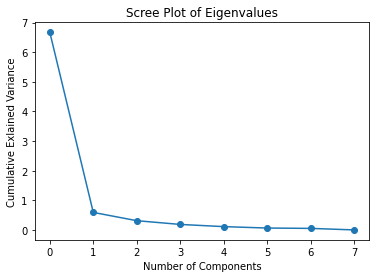

In [204]:
pca.scree_plot()

According to the scree plot, we can locate the elbow at index 2 of the x-axis since the slope of the graph gets gentler significantly. 
This leads to concluding that one principal component is sufficient in explaining the data.
In addition, the fact that the first component (first eigenvalue = $\approx 6.68$) accounting for approximately 83% of the variance justifies the conclusion.

### c. Calculate the principal component scores. (Use your answer in (b) for the number of PCs).

In [222]:
# Total PC scores
pc_score = pd.DataFrame(pca.transform(navy_log).T,  columns=['Prin{}'.format(x+1) for x in range(8)])
pc_score

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
0,5.491479,2.260855,-0.617777,-0.479436,-0.093575,-0.229332,-0.151569,-0.118967
1,4.923231,-0.036854,0.422993,0.150450,-0.237891,-0.090483,-0.029528,-0.106263
2,3.543064,-0.146663,-0.306058,-0.927961,0.266457,-0.010493,0.385888,-0.013294
3,3.846543,-1.458187,0.632234,0.441171,-0.017816,-0.147194,0.154798,-0.107038
4,3.039505,0.683431,0.788768,0.267598,-0.021777,0.803204,-0.406504,0.517980
5,2.644680,-1.342422,0.187476,0.001963,0.053283,0.323971,0.013309,0.042173
6,2.426625,0.023618,-1.416532,0.890544,0.111133,0.403975,0.190741,0.077519
7,0.240755,-1.031523,-0.982508,-0.047804,-0.684067,0.350769,-0.639329,-0.799047
8,0.107410,1.428106,0.378302,-0.096400,-0.193505,0.376368,-0.043488,0.162851
9,0.616750,-0.624187,0.209284,0.210487,-0.131740,0.103716,-0.167748,-0.084936


In [234]:
# use the answer in (b); 1 PC
pc_score[['Prin1']]

,Prin1
0,5.491479
1,4.923231
2,3.543064
3,3.846543
4,3.039505
5,2.644680
6,2.426625
7,0.240755
8,0.107410
9,0.616750


### d. Calculate the correlations between the variables and PC scores.

In [235]:
# Correlations between variables and the first principal component score
corrmat = pd.concat([navy_log, pc_score[['Prin1']]], axis=1, keys=['pc_score','navy_log']).corr().loc['navy_log','pc_score']
corrmat.T

,Prin1
ADO,-0.963459
MAC,-0.930466
WHR,-0.712125
CUA,-0.823862
WNGS,-0.925569
OBC,-0.973629
RMS,-0.982374
MMH,-0.961479


We can check that PC score of the 1st principle component is highly correlated with all of the variables.  

### e. Is there any evidence that the data do not follow a multivariate normal distribution? <br> Answer this question using PC scores.

In [237]:
#2-(e).
from scipy.stats import kstest, shapiro, anderson
x = pc_score['Prin1']
m = x.mean()
s = x.std()
print("Shapiro-Wilk:", shapiro(x),"\n")
print("Kolmogroroc-Smirnov:", kstest(x, 'norm', args = (m,s)),"\n")
print("Anderson-Darling:", anderson(x,'norm'))

Shapiro-Wilk: ShapiroResult(statistic=0.9073554277420044, pvalue=0.026618769392371178) 

Kolmogroroc-Smirnov: KstestResult(statistic=0.19769341980195643, pvalue=0.24785192110938814) 

Anderson-Darling: AndersonResult(statistic=0.9277808161636081, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


According to the Shapiro-Wilk test and the Anderson-Darling test (at 2.5 significance level), we need to reject the null hypothesis, meaning that the first component does not follow the normal distribution. Let's check the second component also.

In [240]:
x2 = pc_score['Prin2']
m2 = x2.mean()
s2 = x2.std()
print("Shapiro-Wilk:", shapiro(x2),"\n")
print("Kolmogroroc-Smirnov:", kstest(x2, 'norm', args = (m2,s2)),"\n")
print("Anderson-Darling:", anderson(x2,'norm'))

Shapiro-Wilk: ShapiroResult(statistic=0.9031442403793335, pvalue=0.02149224281311035) 

Kolmogroroc-Smirnov: KstestResult(statistic=0.1918119697377051, pvalue=0.2791148307179221) 

Anderson-Darling: AndersonResult(statistic=1.0795914983411876, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


The second component also fails to accept the null hypothesis except for the Kolmogroroc-Smirnov test. 
In order for the dataset to follow the multivariate normal distribution, all of the given variables must follow a univariate normal distribution. 
This also applies to the principal component, since the principle component is the linear combination of each variables. 
Thus, we can conclude that the given data does not follow a multivariate normal distribution according to the Shaprio-Wilk test and the Anderson-Darling test.